# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [33]:
def F(n):
    for i in range(2, n):
        for j in range(i, n-1):
            print("-", end="")
        for j in range(i-1, 0, -1):
            print(chr(64+j), end="")
        for j in range(2,i):
            print(chr(64+j), end="")
        for j in range(i, n-1):
            print("-", end="")
        print()

# Tests
F(10)
F(6)

-------A-------
------BAB------
-----CBABC-----
----DCBABCD----
---EDCBABCDE---
--FEDCBABCDEF--
-GFEDCBABCDEFG-
HGFEDCBABCDEFGH
---A---
--BAB--
-CBABC-
DCBABCD


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [34]:
def F(d : dict):
    for key, (x,y) in sorted(d.items(), key= lambda x : x[0]):
        print(f"{key} {x} {y}")
    print("----")
    for key, (x,y) in sorted(d.items(), key= lambda x : x[1][0], reverse=True):
        print(f"{key} {x} {y}")
    print("----")
    for key, (x,y) in sorted(d.items(), key= lambda x : x[1][1]):
        print(f"{key} {x} {y}")
    print("----")

# Tests
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

1 1 2
2 -1 4
4 2 3
5 -4 3
----
4 2 3
1 1 2
2 -1 4
5 -4 3
----
1 1 2
5 -4 3
4 2 3
2 -1 4
----
-8 4 2
5 9 -10
6 -3 4
7 2 1
----
5 9 -10
-8 4 2
7 2 1
6 -3 4
----
5 9 -10
7 2 1
-8 4 2
6 -3 4
----


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [1]:
import pandas as pd
student_records = pd.read_csv("student_records.csv")
student_records_df = pd.DataFrame(student_records)
student_records_df.head(10)

,roll_number,department,credit,course_name,course_type,grade
0,588946,MA,3,EC250,hasmed_elective,AB
1,145372,EP,4,EP407,hasmed_elective,CC
2,834515,MA,8,EP885,hasmed_elective,BB
3,344265,CSE,6,CSE699,honours,AB
4,358405,MA,3,EE460,minor,AP
5,781075,CE,8,CE540,honours,CC
6,180828,CSE,6,CE880,minor,AB
7,981238,MM,4,CSE226,minor,AB
8,836881,MM,8,MM530,core,AA
9,310604,EE,8,EE202,core,AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [30]:
df = student_records_df.groupby('roll_number')
grade_map = {"AP" : 10, "AA" : 10, "AB" : 9, "BB" : 8, "BC" : 7, "CC" : 6}
for roll_number in df.indices:
    sum = 0
    credit_sum = 0
    for row_number in df.indices[roll_number]:
        course = student_records_df.loc[row_number]
        if course['course_type'] == 'honours' or course['course_type'] == 'minor' or course['course_type'] == 'alc':
            continue
        sum += grade_map[course['grade']] * course['credit']
        credit_sum += course['credit']
    cpi = sum / credit_sum
    print(f"Roll number: {roll_number}, CPI: {cpi}")

Roll number: 124663, CPI: 8.23
Roll number: 138296, CPI: 7.991228070175438
Roll number: 143142, CPI: 8.562962962962963
Roll number: 143856, CPI: 8.491803278688524
Roll number: 144528, CPI: 8.571428571428571
Roll number: 145372, CPI: 7.428571428571429
Roll number: 150503, CPI: 8.433823529411764
Roll number: 159438, CPI: 8.432692307692308
Roll number: 180828, CPI: 7.9035087719298245
Roll number: 194063, CPI: 7.951456310679611
Roll number: 199713, CPI: 7.980952380952381
Roll number: 203200, CPI: 8.64516129032258
Roll number: 207443, CPI: 8.18918918918919
Roll number: 208100, CPI: 8.731481481481481
Roll number: 214270, CPI: 7.507936507936508
Roll number: 265922, CPI: 8.245398773006135
Roll number: 270007, CPI: 7.75
Roll number: 282482, CPI: 7.876923076923077
Roll number: 283796, CPI: 8.87719298245614
Roll number: 294697, CPI: 8.491329479768787
Roll number: 301135, CPI: 8.323232323232324
Roll number: 310604, CPI: 8.217391304347826
Roll number: 327122, CPI: 8.236842105263158
Roll number: 329

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [38]:
graduated_list = []
minor_completion_list = []
honors_completion_list = []
for roll_number in df.indices:
    sums = {"core": 0, "department_elective": 0, "flexible_elective": 0, "hasmed_elective": 0, "alc" : 0, "minor" : 0, "honours" : 0}
    for row_number in df.indices[roll_number]:
        course = student_records_df.loc[row_number]
        sums[course['course_type']] += course['credit']
    if sums['core'] >= 20 and sums['department_elective'] >= 15 and sums['flexible_elective'] >= 10 and sums['hasmed_elective'] >= 5:
        graduated_list.append(roll_number)
    if sums['core'] >= 20 and sums['honours'] >= 10:
        honors_completion_list.append(roll_number)
print(graduated_list)

[124663, 143142, 143856, 144528, 150503, 159438, 180828, 203200, 207443, 214270, 265922, 282482, 283796, 294697, 310604, 327122, 362471, 379479, 381227, 388969, 391848, 461971, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 588946, 608522, 608952, 626000, 628849, 630568, 681499, 692318, 703403, 716985, 721490, 750259, 773982, 781075, 782129, 787967, 810863, 834515, 836881, 845623, 871746, 879634, 881983, 888886, 928288, 955757, 960395, 970791, 971123, 973158, 981238, 986057, 998293]


#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [39]:
graduated_list = []
minor_completion_list = []
for roll_number in df.indices:
    sums = {"core": 0, "department_elective": 0, "flexible_elective": 0, "hasmed_elective": 0, "alc" : 0, "minor" : 0, "honours" : 0}
    minor_credits_by_department = {}
    for row_number in df.indices[roll_number]:
        course = student_records_df.loc[row_number]
        course_type = course['course_type']
        department = course['department']
        sums[course['course_type']] += course['credit']
        if course_type == 'minor':
            if department not in minor_credits_by_department:
                minor_credits_by_department[department] = 0
            minor_credits_by_department[department] += course['credit']
    
    for department, minor_credits in minor_credits_by_department.items():
        if minor_credits >= 10:
            minor_completion_list.append(roll_number)
            break

print(minor_completion_list)

[124663, 138296, 143142, 143856, 144528, 145372, 150503, 159438, 180828, 194063, 199713, 203200, 207443, 208100, 214270, 265922, 270007, 282482, 283796, 294697, 301135, 327122, 329535, 344265, 358405, 362471, 364146, 379479, 381227, 381526, 388969, 391848, 458200, 461584, 461971, 465496, 478606, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 582912, 588946, 597353, 608522, 608952, 613401, 626000, 628849, 630568, 680096, 681499, 692318, 703403, 716985, 718510, 721490, 733782, 750259, 773982, 775967, 781075, 782129, 787967, 788020, 810863, 816041, 834515, 836431, 836881, 841365, 845623, 847809, 851029, 871746, 879634, 881983, 888886, 907454, 955757, 960395, 970791, 971123, 973158, 981238, 986057, 993835, 995208, 998293]


#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [40]:
print(honors_completion_list)

[124663, 143142, 143856, 144528, 145372, 150503, 159438, 199713, 203200, 207443, 208100, 214270, 265922, 282482, 283796, 294697, 310604, 327122, 362471, 364146, 379479, 388969, 391848, 458200, 461971, 465496, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 582912, 588946, 589528, 608522, 608952, 613401, 626000, 628849, 630568, 681499, 692318, 703403, 716985, 718510, 721490, 750259, 773982, 781075, 782129, 787967, 788020, 810863, 834515, 836881, 845623, 870642, 871746, 879634, 881983, 888886, 928288, 955757, 960395, 970791, 971123, 973158, 986057, 998293]


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [41]:
import numpy as np
from scipy.optimize import minimize

def f(x1):
    x = x1[0]
    y = x1[1]
    return 2 * (x-y-3)**2 + 4 * (x+2*y + 1)**4

def c1(x1):
    x = x1[0]
    y = x1[1]
    return x-y+3

def c2(x1):
    x = x1[0]
    y = x1[1]
    return 5-(x+2)**2-(y+1)**2

con1 = {'type' : 'ineq', 'fun' : c1}
con2 = {'type' : 'ineq', 'fun' : c2}

x0 = [0,0]

res = minimize(f, x0, method='SLSQP', constraints = [con1, con2])
print(res)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 7.345026216977383
       x: [ 2.349e-01 -9.285e-01]
     nit: 9
     jac: [-1.120e+01 -3.582e-01]
    nfev: 31
    njev: 9


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [42]:
from scipy.integrate import quad

def f(x):
    return (3*(np.cos(x)**2) + 9*(np.sin(x))**4)

I, err = quad(f, 0, 2*np.pi)
print(I, err)

30.630528372500482 3.1043229653526794e-09


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [34]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [35]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(data_path):
    points = []
    with open(data_path, 'r') as f:
        for line in f.readlines():
            x,y = line.split(',')
            x = float(x)
            y = float(y.removesuffix('\n'))
            points.append([x,y])
        points = (np.array(points))
    return points

In [36]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(len(data), K, replace=False)
        return data[indices]
    else:
        return np.array(init_centers)

In [37]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N

def initialise_labels(data):
    n = len(data)
    return np.array([1]*n)

In [38]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK
def calculate_distances(data, centers):
    distance_array = []
    for data_point in data:
        distance_subarray = []
        for center in centers:
            dist = np.sqrt((data_point[0] - center[0])**2 + (data_point[1] - center[1])**2)
            distance_subarray.append(dist)
        distance_array.append(distance_subarray)
    return np.array(distance_array)

In [39]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
def update_labels(distances):
    return np.argmin(distances, axis=1)

In [40]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K):
    centers = []
    for i in range(K):
        points_with_i = data[labels == i]
        if len(points_with_i) == 0:
            centers.append(np.random.uniform(data.min(axis=0), data.max(axis=0)))
        else:
            centers.append(points_with_i.mean(axis=0))
    return np.array(centers)


In [41]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(labels1, labels2):
    return np.array_equal(labels1, labels2)

In [42]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [43]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    ### Set title as 'K-means clustering'
    plt.gca().set_title('K-means clustering')

    ### Set xlabel as 'Longitude'
    plt.gca().set_xlabel('Longitude')
    ### Set ylabel as 'Latitude'
    plt.gca().set_ylabel('Latitude')
    ### Save the plot as 'kmeans.png'
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt

Time taken for the algorithm to converge: 0.004442930221557617


<module 'matplotlib.pyplot' from 'C:\\Users\\pravm\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

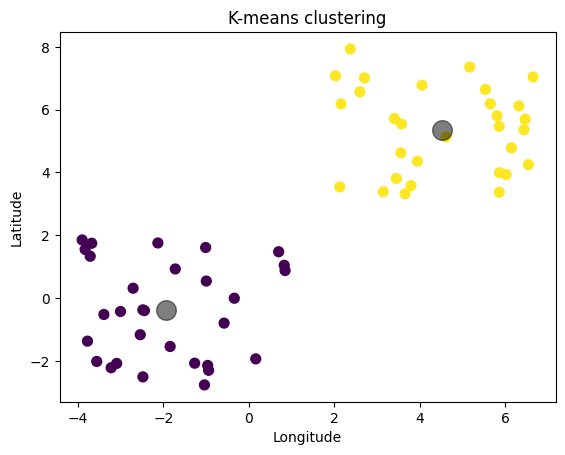

In [45]:
### After you have completed the above functions, run the following code to generate the plot
data_path = 'spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)